<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Node centrality </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>April 2 - 4, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is node centrality?
<hr style="height:1px;border:none" />

## I'm the center of the universe

Among nodes in a network, some are more *important* than others. One way to describe how important a node is, is by calculating its **centrality**. A node centrality is a measure quantifying how important the node is. 

  * High centrality $\rightarrow$ Important node
  * Low centrality $\rightarrow$ Not so important
  
Now, the centrality depends on how you define the importance of a node. There are a number of centrality measures, but we will cover a few widely-used ones in this module.

# 2. Degree centrality
<hr style="height:1px;border:none" />

The idea behind the degree centrality is that the more connected a node is, the more important that node is. The degree centrality is simply the node degree, divided by $n-1$, where $n$ is the number of all available nodes. The degree centrality for all nodes in a graph can be calculated by the **`degree_centrality`** in **`networkx`**. It returns a dictionary-like object with nodes as keys and degree centralities as values. Here are examples of degree centrality on the karate network and network science co-authorship network.


`<DegreeCentral.py>`

In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship

# degree centrality
Cdeg_karate = nx.degree_centrality(G_karate)  
Cdeg_netsci = nx.degree_centrality(G_netsci)  

Here are degree centralities.

In [3]:
Cdeg_karate

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 20: 0.09090909090909091,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 24: 0.15151515151515152,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 27: 0.06060606060606061,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 34: 0.5151515151515151}

In [4]:
#Cdeg_netsci

Now let's examine which nodes have high degree centralities. First, the karate network.

In [4]:
# sorting nodes by degree centrality
# first, karate network
Cdeg_karate_node = Cdeg_karate.keys()
Cdeg_karate_k = Cdeg_karate.values()
sortedNodes_karate = sorted(zip(Cdeg_karate_node, Cdeg_karate_k), 
                            key=lambda x: x[1], reverse=True)
sCdeg_karate_node, sCdeg_karate_k = zip(*sortedNodes_karate)


# top nodes and their degree centrality
print('Karate network -- Top degree centrality nodes')
print('Node         \tDegree centrality')
for iNode in range(5):
    print('%-14s\t' % str(sCdeg_karate_node[iNode]), end='')
    print('%6.4f' % sCdeg_karate_k[iNode])
print()

Karate network -- Top degree centrality nodes
Node         	Degree centrality
34            	0.5152
1             	0.4848
33            	0.3636
3             	0.3030
2             	0.2727



Next, the network science network.

In [7]:
# sorting nodes by degree centrality
# next, netsci network
Cdeg_netsci_node = Cdeg_netsci.keys()
Cdeg_netsci_k = Cdeg_netsci.values()
sortedNodes_netsci = sorted(zip(Cdeg_netsci_node, Cdeg_netsci_k), 
                            key=lambda x: x[1], reverse=True)
sCdeg_netsci_node, sCdeg_netsci_k = zip(*sortedNodes_netsci)


# top nodes and their degree centrality
print('Network science co-authorship network -- Top degree centrality nodes')
print('%-16s' % 'Node' + '\tDegree centrality')
for iNode in range(15):
    print('%-16s\t' % str(sCdeg_netsci_node[iNode]), end='')
    print('%6.4f' % sCdeg_netsci_k[iNode])
print()

Network science co-authorship network -- Top degree centrality nodes
Node            	Degree centrality
BARABASI, A     	0.0214
NEWMAN, M       	0.0170
JEONG, H        	0.0170
OLTVAI, Z       	0.0132
MANSFIELD, T    	0.0126
YOUNG, M        	0.0126
CAGNEY, G       	0.0126
UETZ, P         	0.0126
LI, Y           	0.0120
BOCCALETTI, S   	0.0120
LOCKSHON, D     	0.0120
NARAYAN, V      	0.0120
CONOVER, D      	0.0120
VIJAYADAMODAR, G	0.0120
YANG, M         	0.0120



We can visually examine degree centralities, just for the karate network.

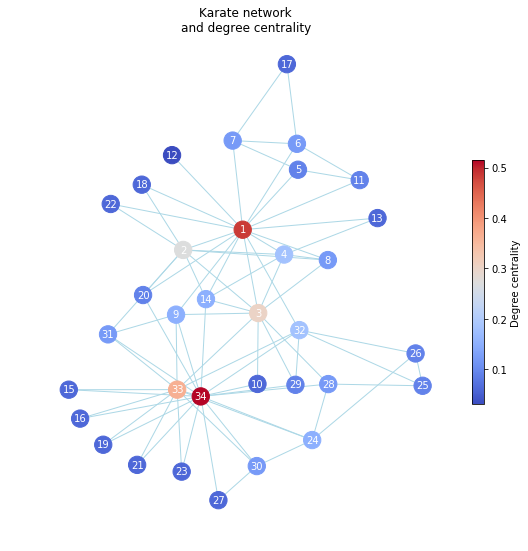

In [8]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cdeg_karate_k))
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.axis('off')
plt.title('Karate network\nand degree centrality')
vmin = sCdeg_karate_k[-1]
vmax = sCdeg_karate_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Degree centrality')
plt.show()

# 3. Eigenvector centrality
<hr style="height:1px;border:none" />

In the degree centrality, we only care the number of connections. We do not care whether nodes are connected to other important nodes. The **eigenvector centrality** takes into an account of information as to whether a node is connected to other important nodes (with high eigenvector centrality). The eigenvector centrality is a variant of the *PageRank centrality* which is used by Google to determine the importance of hits. 

<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/NetCent_PageRank.png?raw=true" alt="PageRank centrality"/>

Here, node B has high centrality due to its large number of connections. Node C also has high centrality because it is connected to B (a high centrality node). 

Mathematical formulations for the eigenvector centrality is beyond the scope of this class. You can calculate eigenvector centrality with the **`eigenvector_centrality`** function in **`networkx`**. Its use is very similar to that of `degree_centrality`. Here are examples of eigenvector centralities.

`<EigenCentral.py>`

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship

# eigenvector centrality
Ceig_karate = nx.eigenvector_centrality(G_karate)  
Ceig_netsci = nx.eigenvector_centrality(G_netsci)  

And here are the important nodes, defined by eigenvector centralities.

In [13]:
# sorting nodes by eigenvector centrality
# first, karate network
Ceig_karate_node = Ceig_karate.keys()
Ceig_karate_k = Ceig_karate.values()
sortedNodes_karate = sorted(zip(Ceig_karate_node, Ceig_karate_k), 
                            key=lambda x: x[1], reverse=True)
sCeig_karate_node, sCeig_karate_k = zip(*sortedNodes_karate)

# next, netsci network
Ceig_netsci_node = Ceig_netsci.keys()
Ceig_netsci_k = Ceig_netsci.values()
sortedNodes_netsci = sorted(zip(Ceig_netsci_node, Ceig_netsci_k), 
                            key=lambda x: x[1], reverse=True)
sCeig_netsci_node, sCeig_netsci_k = zip(*sortedNodes_netsci)



# top nodes and their eigenvector centrality
print('Karate network -- Top degree centrality nodes')
print('Node           \tEigenvector centrality')
for iNode in range(5):
    print('%-14s\t' % str(sCeig_karate_node[iNode]), end='')
    print('%6.4f' % sCeig_karate_k[iNode])
print()

print('Network science co-authorship network -- Top degree centrality nodes')
print('%-16s' % 'Node' + '\tEigenvector centrality')
for iNode in range(15):
    print('%-16s\t' % str(sCeig_netsci_node[iNode]), end='')
    print('%6.4f' % sCeig_netsci_k[iNode])
print()

Karate network -- Top degree centrality nodes
Node           	Eigenvector centrality
34            	0.3734
1             	0.3555
3             	0.3172
33            	0.3087
2             	0.2660

Network science co-authorship network -- Top degree centrality nodes
Node            	Eigenvector centrality
MANSFIELD, T    	0.2250
CAGNEY, G       	0.2250
UETZ, P         	0.2250
LI, Y           	0.2232
GIOT, L         	0.2232
LOCKSHON, D     	0.2232
NARAYAN, V      	0.2232
CONOVER, D      	0.2232
VIJAYADAMODAR, G	0.2232
YANG, M         	0.2232
POCHART, P      	0.2232
ROTHBERG, J     	0.2232
JOHNSTON, M     	0.2232
JUDSON, R       	0.2232
FIELDS, S       	0.2232



Here are all eigenvector centralities from the karate network.

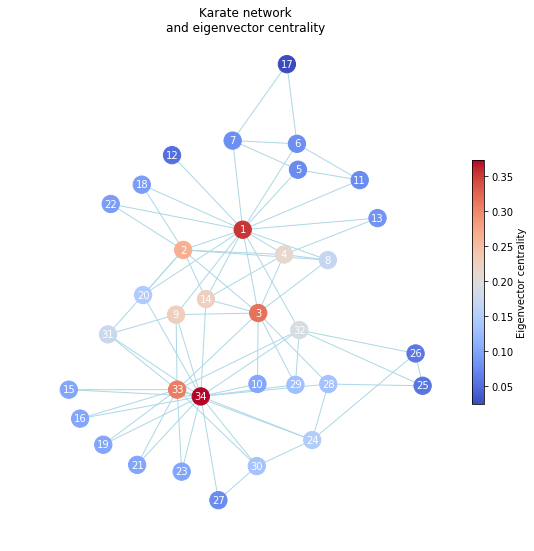

In [14]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Ceig_karate_k))
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.axis('off')
plt.title('Karate network\nand eigenvector centrality')
vmin = sCeig_karate_k[-1]
vmax = sCeig_karate_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Eigenvector centrality')
plt.show()

### Exercise
1. **Eigenvector centrality, Les Mis network**. Determine the top 5 most important nodes (in terms of eigenvector centrality) in the Les Miserables interaction network, available in a file **`lesmis.gml`**.

# 4. Betweenness centrality
<hr style="height:1px;border:none" />

Say, if you are in San Francisco, and you want to visit your friend on East Bay (Berkeley, Oakland, etc.). You decide to take the train. The shortest paths from any station in San Francisco to East Bay have to go through Embarcadero and West Oakland. In this case, those two stations are very important to the network.

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/NetCent_BART.gif?raw=true" alt="BART map"/>


On the other hand, if you decide to drive, the shortest paths can take multiple routes, depending on the origin and the destination. 

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/NetCent_Road.png?raw=true" alt="Road map"/>

The **betweenness centrality** is determined by counting how many shortest paths, between any pairs of nodes, goes through a particular node. A high betweenness centrality network is important because it mediates the traffic in the network (just like Embarcadero and West Oakland). More precisely, the betweenness centrality is determined as the fraction of shortest paths that goes through a particular nodes, over all possible shortest paths. We can use **`betweenness_centrality`** function to determine betweenness centralities of nodes in a network. Here are examples.

`<BetweenCentral.py>`

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship

# betweenness centrality
Cbet_karate = nx.betweenness_centrality(G_karate)  
Cbet_netsci = nx.betweenness_centrality(G_netsci)  

And here are the important nodes, in terms of betweenness centrality.

In [17]:
# sorting nodes by betweenness centrality
# first, karate network
Cbet_karate_node = Cbet_karate.keys()
Cbet_karate_k = Cbet_karate.values()
sortedNodes_karate = sorted(zip(Cbet_karate_node, Cbet_karate_k), 
                            key=lambda x: x[1], reverse=True)
sCbet_karate_node, sCbet_karate_k = zip(*sortedNodes_karate)

# next, netsci network
Cbet_netsci_node = Cbet_netsci.keys()
Cbet_netsci_k = Cbet_netsci.values()
sortedNodes_netsci = sorted(zip(Cbet_netsci_node, Cbet_netsci_k), 
                            key=lambda x: x[1], reverse=True)
sCbet_netsci_node, sCbet_netsci_k = zip(*sortedNodes_netsci)



# top nodes and their betweenness centrality
print('Karate network -- Top degree centrality nodes')
print('Node             \tBetweenness centrality')
for iNode in range(5):
    print('%-16s\t' % str(sCbet_karate_node[iNode]), end='')
    print('%6.4f' % sCbet_karate_k[iNode])
print()

print('Network science co-authorship network -- Top degree centrality nodes')
print('Node             \tBetweenness centrality')
for iNode in range(15):
    print('%-16s\t' % str(sCbet_netsci_node[iNode]), end='')
    print('%6.4f' % sCbet_netsci_k[iNode])
print()

Karate network -- Top degree centrality nodes
Node             	Betweenness centrality
1               	0.4376
34              	0.3041
33              	0.1452
3               	0.1437
32              	0.1383

Network science co-authorship network -- Top degree centrality nodes
Node             	Betweenness centrality
NEWMAN, M       	0.0225
PASTORSATORRAS, R	0.0195
MORENO, Y       	0.0162
SOLE, R         	0.0153
BOCCALETTI, S   	0.0144
JEONG, H        	0.0142
HOLME, P        	0.0131
CALDARELLI, G   	0.0125
BIANCONI, G     	0.0099
CAPOCCI, A      	0.0099
VESPIGNANI, A   	0.0088
BARABASI, A     	0.0086
STAUFFER, D     	0.0084
KURTHS, J       	0.0071
ALBERT, R       	0.0052



Let's examine betweenness centralities in the karate network.

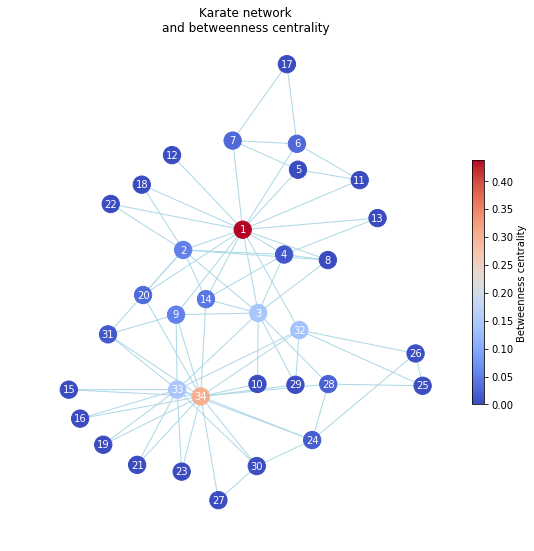

In [18]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cbet_karate_k))
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.axis('off')
plt.title('Karate network\nand betweenness centrality')
vmin = sCbet_karate_k[-1]
vmax = sCbet_karate_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Betweenness centrality')
plt.show()

One this to note about the betweenness centrality is that it is only appropriate for describing transportation of materials without duplication. In other words, materials passed on the network has to have the origin and the target, and can only traverse on a single path. Thus betweenness centrality is appropriate for transportation networks and infrastructure networks. In the karate network, the betweenness centrality matters only when describing passing of tangible objects among members (e.g., lending/borrowing a book). 

If your network describes transfers of materials that can be duplicated and have no clear origin or target (e.g., rumors, epidemics), then the betweenness centrality is no longer appropriate in quantifying the importance of nodes. 

### Exercise
1. **Bypasses**. In the karate network described above, add the following edges:
  * (2, 24)
  * (6, 9)
  * (14, 29)
  
  After adding the edges, re-generate the list of top 5 betweenness centrality nodes.

# 5. Closeness centrality
<hr style="height:1px;border:none" />

As I mentioned above, betweenness centrality may not be appropriate in determining influential nodes in a spread of a rumor or an epidemic. In such cases, **closeness centrality** may be more appropriate. The closeness centrality is the inverse of the shortest path length from a node to all the other nodes in a network. Here is a simple illustration with the karate network.


`<CloseCentral.py>`

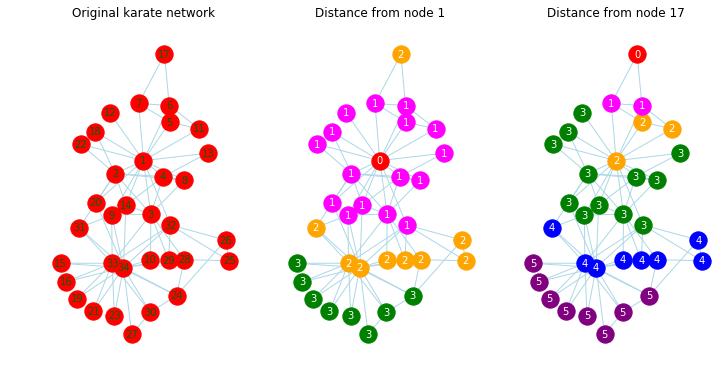

In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_netsci = nx.read_gml('netscience.gml')  # network science co-authorship



# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[12,6])
plt.subplot(131)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Original karate network')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

# drawing the distance from node 1
plt.subplot(132)
D1 = nx.shortest_path_length(G_karate, source=1)
D1_node = list(D1.keys())
D1_d = list(D1.values())
# for loop do draw nodes and labels
nodeC = ['red','magenta','orange','green','blue','purple']
for i,iNode in enumerate(D1_node):
    nodeLabel = {iNode: str(D1_d[i])}
    nx.draw_networkx_nodes(G_karate, pos, nodelist=[iNode], 
                           node_color=nodeC[D1_d[i]])
    nx.draw_networkx_labels(G_karate, pos, labels= nodeLabel,
                            font_size=10, font_color='White')
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
plt.title('Distance from node 1')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

# drawing the distance from node 17
plt.subplot(133)
D17 = nx.shortest_path_length(G_karate, source=17)
D17_node = list(D17.keys())
D17_d = list(D17.values())
# for loop do draw nodes and labels
nodeC = ['red','magenta','orange','green','blue','purple']
for i,iNode in enumerate(D17_node):
    nodeLabel = {iNode: str(D17_d[i])}
    nx.draw_networkx_nodes(G_karate, pos, nodelist=[iNode], 
                           node_color=nodeC[D17_d[i]])
    nx.draw_networkx_labels(G_karate, pos, labels= nodeLabel,
                            font_size=10, font_color='White')
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
plt.title('Distance from node 17')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

plt.show()

As you can see, node 1 is within 3 steps from any other nodes in the network. Consequently it is easy to spread something (e.g., a facebook post) to the entire network from node 1. Thus, node 1 has high closeness centrality. On the other hand, some nodes are hard to reach from node 17. Thus node 17 has low closeness centrality.

Closeness centrality can be calculated by **`closeness_centrality`** function. Here are some examples.

In [20]:
# closeness centrality
Cclo_karate = nx.closeness_centrality(G_karate)  
Cclo_netsci = nx.closeness_centrality(G_netsci)  



# sorting nodes by closeness centrality
# first, karate network
Cclo_karate_node = Cclo_karate.keys()
Cclo_karate_k = Cclo_karate.values()
sortedNodes_karate = sorted(zip(Cclo_karate_node, Cclo_karate_k), 
                            key=lambda x: x[1], reverse=True)
sCclo_karate_node, sCclo_karate_k = zip(*sortedNodes_karate)

# next, netsci network
Cclo_netsci_node = Cclo_netsci.keys()
Cclo_netsci_k = Cclo_netsci.values()
sortedNodes_netsci = sorted(zip(Cclo_netsci_node, Cclo_netsci_k), 
                            key=lambda x: x[1], reverse=True)
sCclo_netsci_node, sCclo_netsci_k = zip(*sortedNodes_netsci)



# top nodes and their closeness centrality
print('Karate network -- Top degree centrality nodes')
print('Node             \tCloseness centrality')
for iNode in range(5):
    print('%-16s\t' % str(sCclo_karate_node[iNode]), end='')
    print('%6.4f' % sCclo_karate_k[iNode])
print()

print('Network science co-authorship network -- Top degree centrality nodes')
print('Node             \tCloseness centrality')
for iNode in range(15):
    print('%-16s\t' % str(sCclo_netsci_node[iNode]), end='')
    print('%6.4f' % sCclo_netsci_k[iNode])
print()

Karate network -- Top degree centrality nodes
Node             	Closeness centrality
1               	0.5690
3               	0.5593
34              	0.5500
32              	0.5410
9               	0.5156

Network science co-authorship network -- Top degree centrality nodes
Node             	Closeness centrality
NEWMAN, M       	0.0611
SOLE, R         	0.0593
PASTORSATORRAS, R	0.0588
HOLME, P        	0.0579
CALDARELLI, G   	0.0554
VESPIGNANI, A   	0.0549
JEONG, H        	0.0547
BIANCONI, G     	0.0529
GHOSHAL, G      	0.0524
LEICHT, E       	0.0523
LILJEROS, F     	0.0523
EDLING, C       	0.0523
KEPLER, T       	0.0519
SMITH, E        	0.0519
CAPOCCI, A      	0.0516



And here are closeness centralities in the karate network.

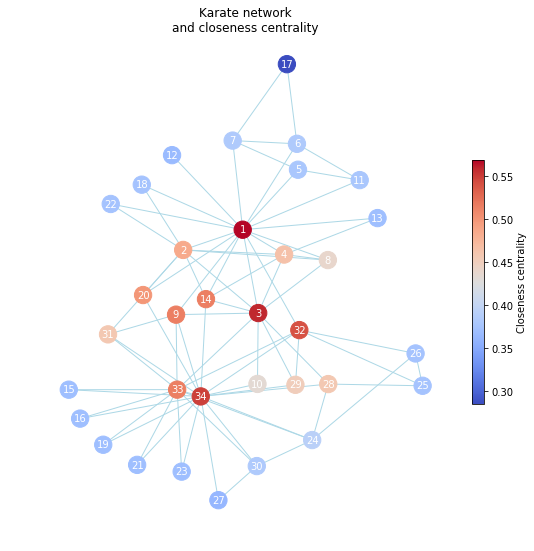

In [21]:
# drawing the graph (karate network only) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cclo_karate_k))
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.axis('off')
plt.title('Karate network\nand closeness centrality')
vmin = sCclo_karate_k[-1]
vmax = sCclo_karate_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Closeness centrality')
plt.show()

### Exercise
1. **Bypasses, revisited**. In the karate network described above, add the following edges:
  * (2, 24)
  * (6, 9)
  * (14, 29)
  
  After adding the edges, re-generate the list of top 5 closeness centrality nodes.